# Dimension reduction and Clustering

In [48]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob #Used to read all present files
# pd.set_option('display.max_rows', 1000)

In [69]:
all_data = pd.DataFrame()
for f in glob.glob("data/*_fixed.xlsx"):
    print(f)
    df = pd.read_excel(f, skiprows = range(0, 1))
    all_data = all_data.append(df,ignore_index=True)
# all_data.describe()
# Drop all columns that have missing values

# print(all_data.columns[all_data.isna()].tolist())
for f in all_data.columns[all_data.isna().any()].tolist():
    # working on set NaN to average of column
    for n in all_data[all_data[f].isnull()]:
        print(n)
#     all_data = all_data.drop(f, axis= 1) #Drop all NaN's
# print(all_data)

data/wiedrick_poultry_wiedrick_poultry_house_1_fixed.xlsx
data/airport_line_airport_line_house_1_fixed.xlsx
Animal age
Animal weight
Animal weight - Deviation
Animal weight - Growth per day
Animal weight - Normality
Animal weight - Uniformity
Average house temperature
Average inside RH
Average outside RH
Average outside temperature
Date
Feed conversion (FC)
Feed per animal
Number of animals
Water feed conversion (W:F)
Water per animal


           Date  Animal weight - Growth per day  Animal weight - Normality  \
0    2017-11-01                              68                       1047   
1    2017-11-02                              80                       1132   
2    2017-11-04                              80                       1302   
3    2017-11-05                              65                       1387   
4    2017-11-06                              98                       1473   
5    2017-11-07                              84                       1567   
6    2017-11-08                              92                       1662   
7    2017-11-09                              87                       1757   
8    2017-11-11                              73                       1947   
9    2017-11-12                              97                       2047   
10   2017-11-13                             120                       2147   
11   2017-11-21                              48                 

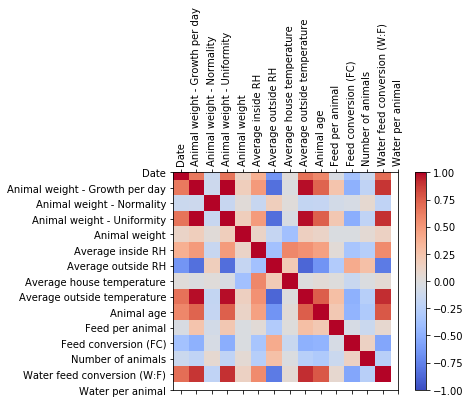

In [43]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fixed.xlsx", skiprows = range(0, 1))
# data2=pd.read_excel("./data/hunt_farm_hunt_farm_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# data3=pd.read_excel("./data/hurondale_hurondale_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# fixedData = data['data.feed_per_animal']
# data=pd.concat()
print(data)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [3]:
highCorr = corr[corr>0]
print(highCorr[highCorr<1].stack())
highCorr[highCorr<1].stack().to_csv("./data/correlation.csv")
highCorr[highCorr<1].stack().to_string("./data/correlation.txt")

Animal weight - Growth per day  Animal weight - Normality         0.124923
                                Animal weight - Uniformity        0.263230
                                Animal weight                     0.167933
                                Average inside RH                 0.030630
                                Average outside RH                0.418960
                                Average outside temperature       0.091149
                                Feed per animal                   0.439869
                                Feed conversion (FC)              0.040307
                                Number of animals                 0.291039
                                Water feed conversion (W:F)       0.040285
                                Water per animal                  0.485426
Animal weight - Normality       Animal weight - Growth per day    0.124923
                                Animal weight - Uniformity        0.095182
                         

In [4]:
# output = open("./data/correlation.txt","w+")
# output.write(highCorr[highCorr<1].stack())
# output.close()



In [5]:
# corr.stack().to_csv("./data/correlation.csv",encoding='utf-8-sig')